# Lasing Code

In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import lasinglib as ll
import simulationlib as sl
import shapes

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

### Use 'widget' to make mpl outputs interactive, and 'inline' to make them render as pngs. 
# %matplotlib widget
%matplotlib inline

# initialize an environment to demonstrate pulses on

CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

sim = sl.Simulation(CHIP, SILICON, duration=6, pulses=None, ambient_temp=300,
                    starting_temp=300, neumann_bc=True,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=0.75, radiation=True, progress_bar=True, silent=False)

Unordered list of pulses:
[Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S -> 1.001NOMOD), Pulse(5.000W, 1.000 + 0.001S

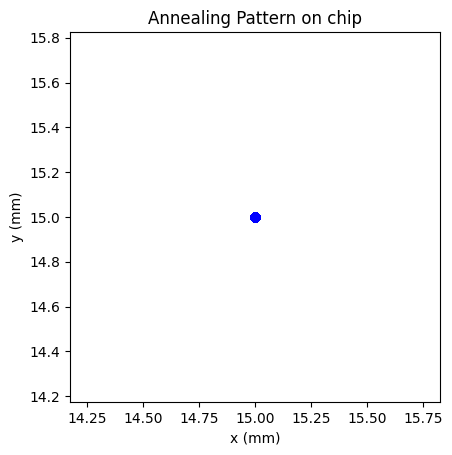

In [18]:
# number aranges to produce a grid
x_coords = np.arange(2, 32, 2)
y_coords = np.arange(2, 32, 2)

# use a lower-resolution SimGrid for a faster simulation so that you aren't here all day
chip_fast = sl.SimGrid(dimension=32, resolution=71, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

# iterate over the grid, building a pulse for each location

pulses = []

# for y in reversed(list(y_coords)):
#     for x in reversed(list(x_coords)):
#         # start time is arbitrary as the pulses will be arranged sequentially one put into a LaserSequence
#         #if (((x == 2) or (x == 30)) or ((y == 2) or (y == 30))):
#             pulses.append(ll.LaserPulse(grid=chip_fast, start=0.25, duration=0.5, position=(x, y), power=1.5, sigma=ll.DEFAULT_LASER_SIGMA))

for i in range(1000):
      pulses.append(ll.LaserPulse(grid=chip_fast, start=1, duration=0.001, position=(15, 15), power=5, sigma=ll.DEFAULT_LASER_SIGMA))
      


print(f"Unordered list of pulses:\n{pulses}\n")

pulse_sequence = ll.LaserSequence(pulses, delay=0.01 - 0.001, start_time=1)

print(f"Ordered LaserSequence:\n{pulse_sequence}\n")


fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

ax.set_title("Annealing Pattern on chip")
ax.plot(pulse_sequence.trace_x, pulse_sequence.trace_y, "bo")
ax.set_ylabel("y (mm)")
ax.set_xlabel("x (mm)")
plt.show()

In [19]:
 # Save the LaserPulse to cycle code under "example cycle code.txt"

CENTERING_OFFSETS = (-2, -1.5)

sample_interval = 0.05 # sample period if a pulse has some sort of parameterization (either or both position and current modulation)
# pulse_sequence.write_to_cycle_code("./cycle code/8x8.txt", sample_interval, *CENTERING_OFFSETS)
pulse_sequence.write_to_cycle_code("C:/Users/ssuub/Desktop/MPSD-TAP/TAPV-2/Application/pythonFiles/DataTextFiles/Cycle Code.txt", sample_interval, *CENTERING_OFFSETS)

# Aperture Analysis

In [10]:
import optris_csv as ocsv
from scipy.signal import medfilt

irisData0 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing Open 2.dat",";").build_array_data()
irisData1_3 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing 1-3 Closed.dat",";").build_array_data()
irisData1_2 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing 1-2 Closed.dat",";").build_array_data()
irisData3_5 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing 3-5 Closed.dat",";").build_array_data()
irisData2_3 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing 2-3 Closed 2.dat",";").build_array_data()
irisData3_4 = ocsv.OptrisDataset("./Caleb/New PC Data/Iris Testing 3-4 Closed.dat",";").build_array_data()

datasets = [irisData0, irisData1_3, irisData1_2, irisData3_5, irisData2_3, irisData3_4]

TIME_CUTOFF = 9000
for data in datasets:
    data = data[data["time"] <= TIME_CUTOFF]


225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


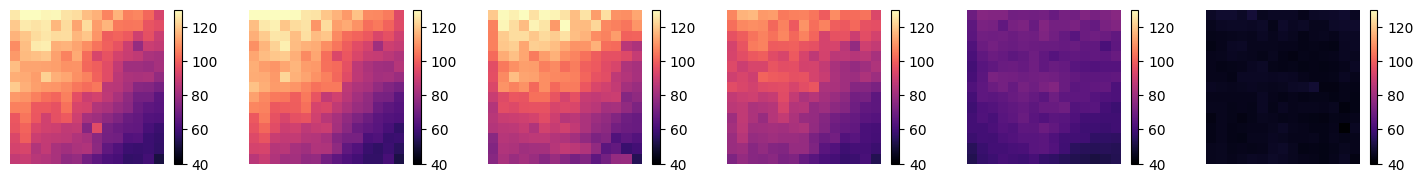

In [11]:
import temperature_analysis as ta
import matplotlib.pyplot as plt


plt.close(8)
fig, ax = plt.subplots(1, 6, figsize = (18,2), num=8)

counter = 0

for data in datasets:
    sample = ta.tempMap(ta.getMaxima(medfilt(data["Detector Area"], kernel_size = 15), trigger = 3), "Right", "Up")

    img = ax[counter].imshow(sample,interpolation='nearest',
                        cmap = 'magma',
                        origin='lower',
                        vmin = 40,
                        vmax = 130)
    ax[counter].set_axis_off()

    plt.colorbar(img, cmap = 'magma')
    counter += 1

plt.show()


# Power Variability

In [12]:
import optris_csv as ocsv
from scipy.signal import medfilt


powers = [50, 75, 100, 125, 150]

datasets = []

powerData25 = [ocsv.OptrisDataset("./Caleb/New PC Data/Vacuum 0.5s 0.25W 1 (1).dat",";").build_array_data(),
               ocsv.OptrisDataset("./Caleb/New PC Data/Vacuum 0.5s 0.25W 2 (1).dat",";").build_array_data(),
               ocsv.OptrisDataset("./Caleb/New PC Data/Vacuum 0.5s 0.25W 3.dat",";").build_array_data()]

datasets.append(powerData25)

for n in range(len(powers)):
    datasets.append([ocsv.OptrisDataset(f"./Caleb/New PC Data/Vacuum 0.5s {powers[n]/100:.2f}W 1.dat",";").build_array_data(),
                        ocsv.OptrisDataset(f"./Caleb/New PC Data/Vacuum 0.5s {powers[n]/100:.2f}W 2.dat",";").build_array_data(),
                        ocsv.OptrisDataset(f"./Caleb/New PC Data/Vacuum 0.5s {powers[n]/100:.2f}W 3.dat",";").build_array_data()])

TIME_CUTOFF = 9000
for dataset in datasets:
    for data in dataset:
        data = data[data["time"] <= TIME_CUTOFF]

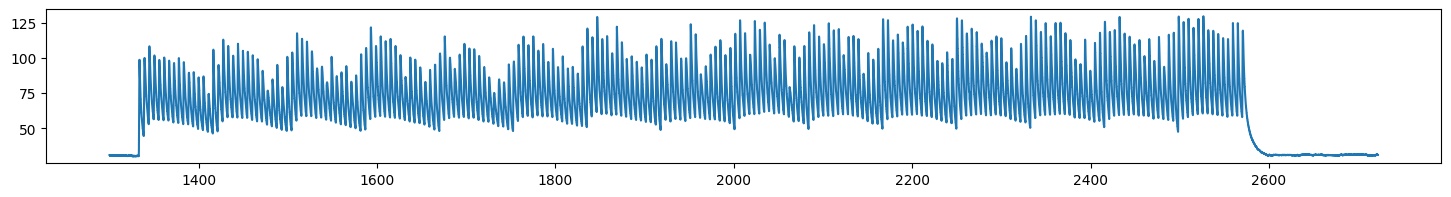

In [13]:
plt.close("maximaTest")
fig, ax = plt.subplots( figsize = (18,2), num="maximaTest")


datasets[2][2] = datasets[2][2][datasets[2][2]["time"] >= 1300]
data = datasets[2][2]

ax.plot(data["time"], medfilt(data["Detector Area"], kernel_size = 15), label = "0.25W")

225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


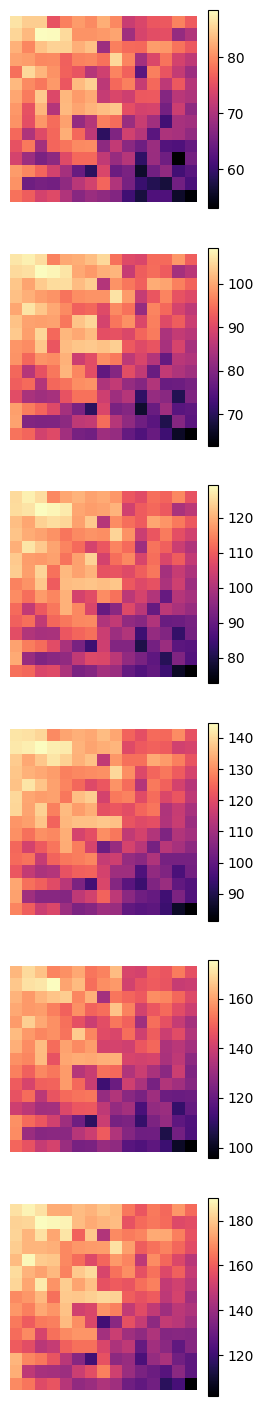

In [14]:
import temperature_analysis as ta
import matplotlib.pyplot as plt


plt.close(9)
fig, ax = plt.subplots(6, 1, figsize = (3,18), num=9)

counter = 0
totalData = []

for dataset in datasets:
    sample = np.mean((ta.tempMap(ta.getMaxima(medfilt(dataset[0]["Detector Area"], kernel_size = 15), trigger = 5), "Right", "Up"),
                      ta.tempMap(ta.getMaxima(medfilt(dataset[1]["Detector Area"], kernel_size = 15), trigger = 3), "Up", "Right"),
                      ta.tempMap(ta.getMaxima(medfilt(dataset[2]["Detector Area"], kernel_size = 15), trigger = 3), "Down", "Left")), axis = 0)
    totalData.append(sample)

    img = ax[counter].imshow(sample,interpolation='nearest',
                        cmap = 'magma',
                        origin='lower')
    ax[counter].set_axis_off()

    plt.colorbar(img, cmap = 'magma')
    counter += 1


plt.show()


(6, 15, 15)


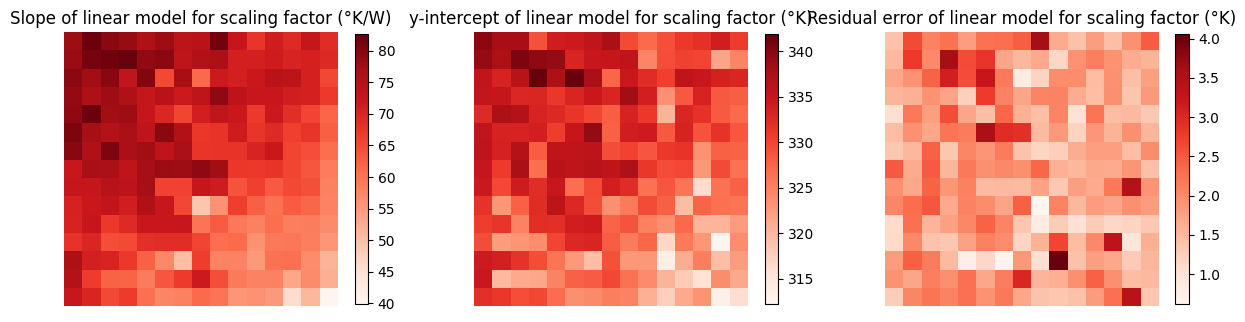

In [15]:
plt.close(11)
fig, ax = plt.subplots(1, 3, figsize = (15,5), num=11)

totalData = np.stack(totalData)

print(totalData.shape)

slopes = np.zeros(totalData.shape[1:])
intercepts = np.zeros(totalData.shape[1:])
residuals = np.zeros(totalData.shape[1:])

for x in range(totalData.shape[1]):
    for y in range(totalData.shape[2]):
        p = np.polyfit([0.25, 0.5, 0.75, 1.0, 1.25, 1.5], totalData[:,x,y], 1)
        slopes[x,y] = p[0]
        intercepts[x,y] = p[1]
        residuals[x,y] = np.sqrt(np.mean((np.polyval(p, [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]) - totalData[:,x,y])**2))


img = ax[0].imshow(slopes, interpolation='nearest',
                    cmap = 'Reds',
                    origin='lower')
ax[0].set_title("Slope of linear model for scaling factor (°K/W)")
ax[0].set_axis_off()

plt.colorbar(img, cmap = 'Reds', shrink = 0.7)

img = ax[1].imshow(intercepts + 273.15, interpolation='nearest',
                    cmap = 'Reds',
                    origin='lower')
ax[1].set_title("y-intercept of linear model for scaling factor (°K)")
ax[1].set_axis_off()

plt.colorbar(img, cmap = 'Reds', shrink = 0.7)

img = ax[2].imshow(residuals, interpolation='nearest',
                    cmap = 'Reds',
                    origin='lower')
ax[2].set_axis_off()
ax[2].set_title("Residual error of linear model for scaling factor (°K)")

plt.colorbar(img, cmap = 'Reds', shrink = 0.7)


plt.show()

72.25523809523806 58.8044444444445


Text(0.5, 1.0, 'Max Temperature vs Power at (2,2) Position')

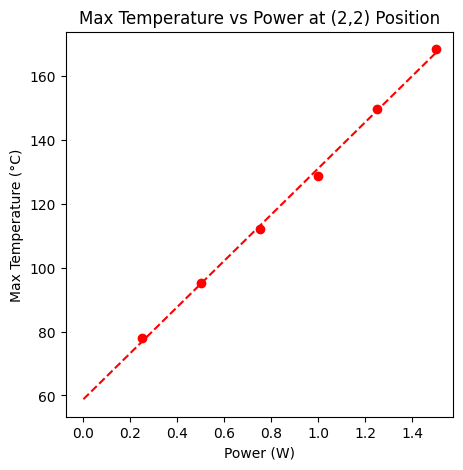

In [16]:
plt.close(12)
fig, ax = plt.subplots(figsize = (5,5), num = 12)

t = np.linspace(0, 1.5, 100)
print(slopes[0,0], intercepts[0,0])
ax.plot(t, slopes[0,0] * t + intercepts[0,0], 'r--', label = "Average Fit")
ax.plot([0.25, 0.5, 0.75, 1.0, 1.25, 1.5], totalData[:,0,0], 'ro', label = "Average Data")
ax.set_xlabel("Power (W)")
ax.set_ylabel("Max Temperature (°C)")
ax.set_title("Max Temperature vs Power at (2,2) Position")

## Reproducibility

In [17]:
import optris_csv as ocsv
from scipy.signal import medfilt

repData1 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 1.dat",";").build_array_data()
repData2 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 2.dat",";").build_array_data()
repData3 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 3.dat",";").build_array_data()
repData4 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 4.dat",";").build_array_data()
repData5 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 5.dat",";").build_array_data()
repData6 = ocsv.OptrisDataset("./Caleb/New PC Data/Reproducibility 6.dat",";").build_array_data()

datasets = [repData1, repData2, repData3, repData4, repData5, repData6]

TIME_CUTOFF = 9000
for data in datasets:
    data = data[data["time"] <= TIME_CUTOFF]

225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


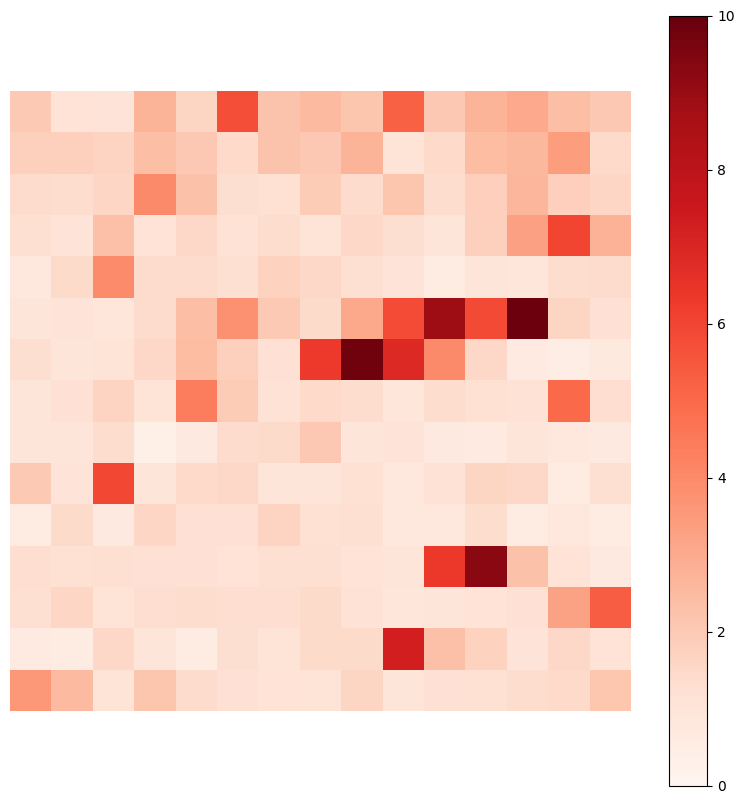

In [18]:
import temperature_analysis as ta
import matplotlib.pyplot as plt


plt.close(10)
fig, ax = plt.subplots(figsize = (10,10), num=10)

sum = np.zeros((15,15))
differenceSum = np.zeros((15,15))

for data in datasets:
    sum += ta.tempMap(ta.getMaxima(medfilt(data["Detector Area"], kernel_size = 15), trigger = 3), "Right", "Up")

for data in datasets:
    differenceSum += np.abs(ta.tempMap(ta.getMaxima(medfilt(data["Detector Area"], kernel_size = 15), trigger = 3), "Right", "Up") - (sum / len(datasets)))

mean = sum / len(datasets)
meanDifference = differenceSum / len(datasets)

img = ax.imshow(meanDifference,interpolation='nearest',
                    cmap = 'Reds',
                    origin='lower',
                    vmin = 0,
                    vmax = 10)
ax.set_axis_off()

plt.colorbar(img, cmap = 'Reds')

plt.show()